### TokenRing

В этой лабораторной работе я рассмотрю реализацию TokenRing с помощью блокирующей очереди

Программа была протестированна на значениях числа потоков от 2 до 8 (т.к. максимальное число потоков на моем ноутбуке 8), и на значениях числа сообщений от 1 до 40. Для каждого теста потоки считали время nanoTime и писали логи каждый в свой файл

In [1]:
threads = [2, 4, 5, 8]
packages = [1, 2, 5, 11, 20, 40]

In [30]:
import numpy as np

thread_dict = {}
for thread in threads:
    pack_dict = {}
    for pack in packages:
        all_lines = []
        for i in range(thread):
            with open(f"LOGS_{thread}_{pack}/Latency{i}.txt") as f:
                for line in f:
                    all_lines.append(line)
        latencies = dict()
        for j in range(thread):
            latencies[j + 14] = [[], []]
        #print(latencies)
        #print(len(all_lines))
        for line in all_lines:
            splitting = line.split()
            status = splitting[0]
            thrd = splitting[-1]
            #print(splitting)
            if status == "Start:":
                latencies[int(thrd)][0].append(int(splitting[2]))
            else:
                #try:
                latencies[int(thrd)][1].append(int(splitting[3]))
                #except:
                #    print(thread, pack)
        pack_dict[pack] = latencies
    thread_dict[thread] = pack_dict            

In [64]:
thread_latency = {}
thread_throughput = {}
for num_thrd in thread_dict:
    thread_latency[num_thrd] = {}
    thread_throughput[num_thrd] = {}
    for num_pack in thread_dict[num_thrd]:
        time_sum = 0
        time_min = -1
        time_max = -1
        for thread in thread_dict[num_thrd][num_pack]:
            neg = np.sum(np.array(thread_dict[num_thrd][num_pack][thread][0]))
            if len(np.array(thread_dict[num_thrd][num_pack][thread][0])) > 0:
                if time_min > np.min(np.array(thread_dict[num_thrd][num_pack][thread][0])) or time_min == -1:
                    time_min = np.min(np.array(thread_dict[num_thrd][num_pack][thread][0]))
            pos = np.sum(np.array(thread_dict[num_thrd][num_pack][thread][1]))
            if len(np.array(thread_dict[num_thrd][num_pack][thread][1])) > 0:
                if time_max < np.max(np.array(thread_dict[num_thrd][num_pack][thread][1])) or time_max == -1:
                    time_max = np.max(np.array(thread_dict[num_thrd][num_pack][thread][1]))
            time_sum = time_sum + (pos - neg)
        thread_latency[num_thrd][num_pack] = time_sum / num_pack
        result = time_max - time_min
        thread_throughput[num_thrd][num_pack] = result
        

In [65]:
thread_latency[4]

{1: 10292000.0,
 2: 13972450.0,
 5: 5059820.0,
 11: 6899690.909090909,
 20: 5485910.0,
 40: 2035250.0}

In [66]:
thread_throughput[4]

{1: 10292000,
 2: 27833900,
 5: 24382700,
 11: 33492400,
 20: 51487000,
 40: 71691700}

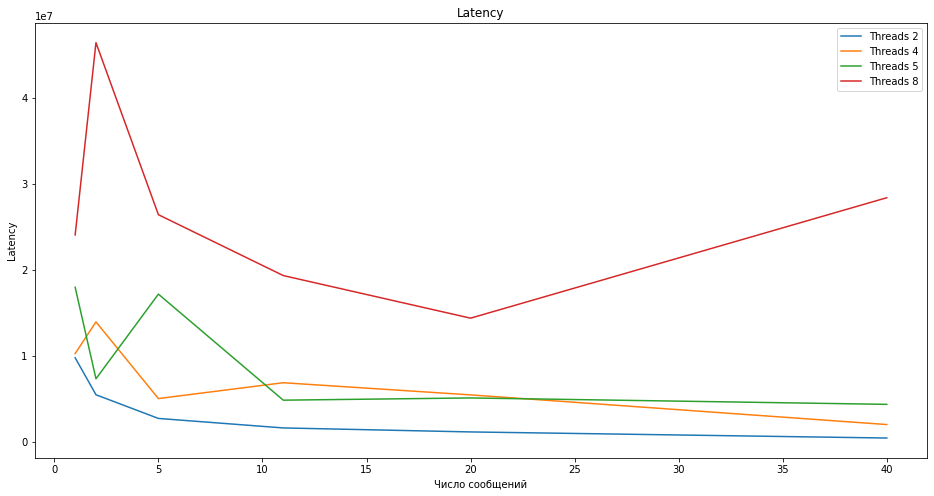

In [52]:
from matplotlib import pyplot as plt

import pylab

fig = PLT.figure(figsize=(16, 8))
for thread in thread_latency:
    key = [key for key in thread_latency[thread].keys()]
    vals = [thread_latency[thread][key] for key in thread_latency[thread].keys()]
    plt.plot(key, vals, label="Threads " + str(thread))
plt.title ("Latency")
plt.xlabel("Число сообщений")
plt.ylabel("Latency")
plt.legend()
plt.show()

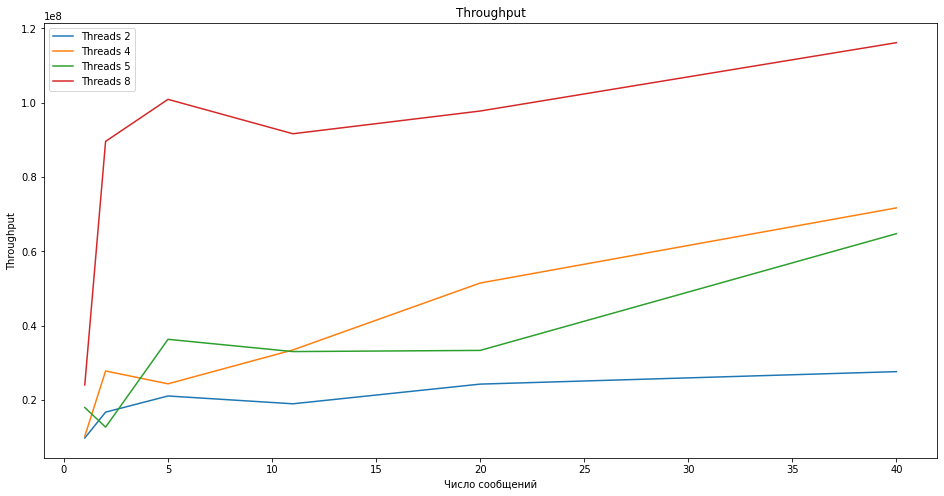

In [68]:

fig = PLT.figure(figsize=(16, 8))
for thread in thread_throughput:
    key = [key for key in thread_throughput[thread].keys()]
    vals = [thread_throughput[thread][key] for key in thread_throughput[thread].keys()]
    plt.plot(key, vals, label="Threads " + str(thread))
plt.title ("Throughput")
plt.xlabel("Число сообщений")
plt.ylabel("Throughput")
plt.legend()
plt.show()

## Итоги:

Ожидаемо и Latency и Throughput будут расти при увеличении сообщений (рост латенси не очень хорошо заметен на малом числе потоков, скорее всего из-за того, что примеры подбирались рандомной генерацией пакетов доставки, поэтому часть пакетов оказались недалеко от конечной точки). 

## Улучшения

Мы рассмотрели только подход с блокирующей очередью, при чем очередь нефиксированной памяти (изначально все пакеты находятся в первой очереди). Можно оптимизировать память вводом ограничения длины очереди.